<h3><b>A SAMPLING METHOD TO DRAW SAMPLES FROM A MULTIVARIATE NORMAL (MVN) DISTRIBUTION IN JAX</b></h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jax import random

sns.set()

In [12]:
d = 10   # dimension
m = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(10, 1)   # mean vector
K_0 =  np.array([[1,0,0,0,0,0,0,0,0,0],
       [0,1,0,0,0,0,0,0,0,0],
       [0,0,1,0,0,0,0,0,0,0],
       [0,0,0,1,0,0,0,0,0,0],
       [0,0,0,0,1,0,0,0,0,0],
       [0,0,0,0,0,1,0,0,0,0],
       [0,0,0,0,0,0,1,0,0,0],
       [0,0,0,0,0,0,0,1,0,0],
       [0,0,0,0,0,0,0,0,1,0],
       [0,0,0,0,0,0,0,0,0,1]])   # covariance function

In [13]:
epsilon = 0.0001    # epsilon
K = K_0 + epsilon * np.identity(d)    # adding small perturbation
L = np.linalg.cholesky(K)   # cholesky decomposition
np.dot(L, np.transpose(L))
n = 10000   # no. of samples

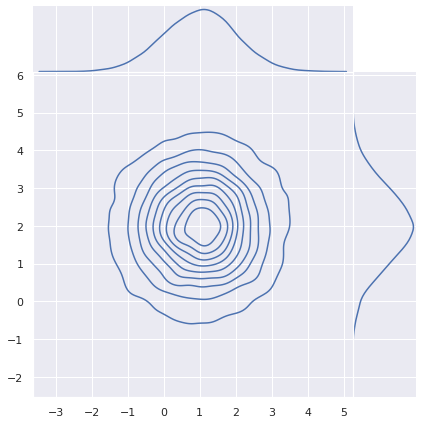

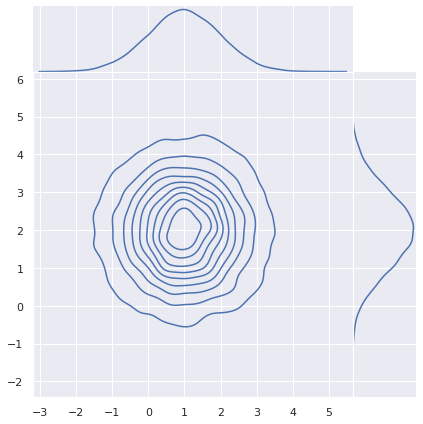

In [8]:
u = np.random.normal(loc=0, scale=1, size=d*n).reshape(d, n)
x = m + np.dot(L, u)
sns.jointplot(x=x[0], y=x[1], kind="kde", space=0);
z = np.random.multivariate_normal(mean=m.reshape(d,), cov=K, size=n)
y = np.transpose(z)
sns.jointplot(x=y[0], y=y[1], kind="kde", space=0)    # plot density function

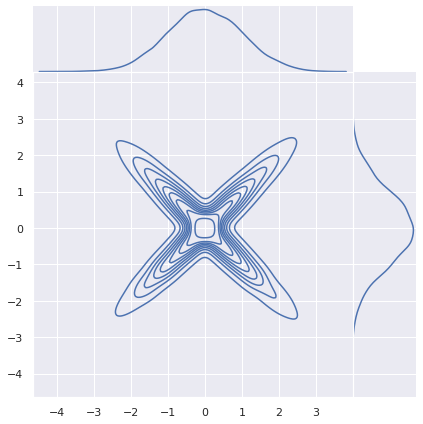

In [9]:
z_1 = np.random.normal(loc=0, scale=1, size=n)
z = np.random.normal(loc=0, scale=1, size=n)
z_2 = np.sign(z)*z_1
sns.jointplot(x=z_1, y=z_2, kind="kde", space=0)